**Import library need by the project**

In [223]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import tensorflow as tf

**Read data from CSV and display the summary**

In [200]:
wines = pd.read_csv('data/winequality-red.csv', sep=',')

wines.head(10)

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [201]:
wines.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


**Observe the variable type. quality could be decrete variable and rest variable could be continuous**

In [202]:
for i, col in enumerate(list(wines.columns.values)):
    print("Column name: {}, type: {}".format(col, wines[col].dtype))

Column name: fixed_acidity, type: float64
Column name: volatile_acidity, type: float64
Column name: citric_acid, type: float64
Column name: residual_sugar, type: float64
Column name: chlorides, type: float64
Column name: free_sulfur_dioxide, type: float64
Column name: total_sulfur_dioxide, type: float64
Column name: density, type: float64
Column name: pH, type: float64
Column name: sulphates, type: float64
Column name: alcohol, type: float64
Column name: quality, type: int64


**We do not want to have empty data, so check if any column misses data**

In [203]:
wines.isnull().any().any()

False

In [204]:
print("Data count after droping NaN: {}".format(len(wines)))

Data count after droping NaN: 1599


**Based on the histogram, quality is from 3 to 9 and we have 3000 records for each quality level**

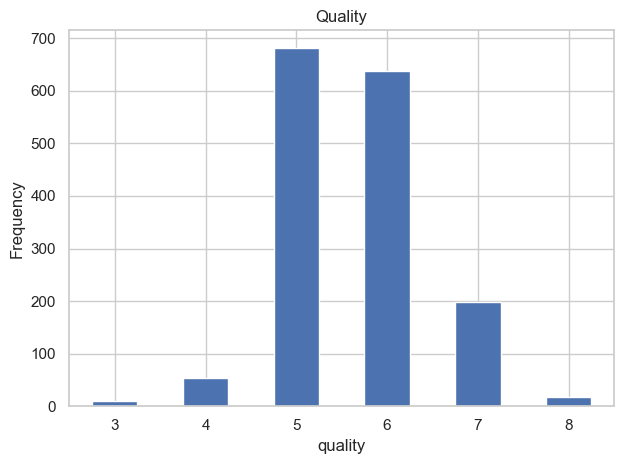

In [205]:
wines['quality'].value_counts().sort_index().plot(kind='bar', title = 'Quality') 

plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

**Heatmap to help us to understand correlation. From here, we can understand alcohol is important for quality**

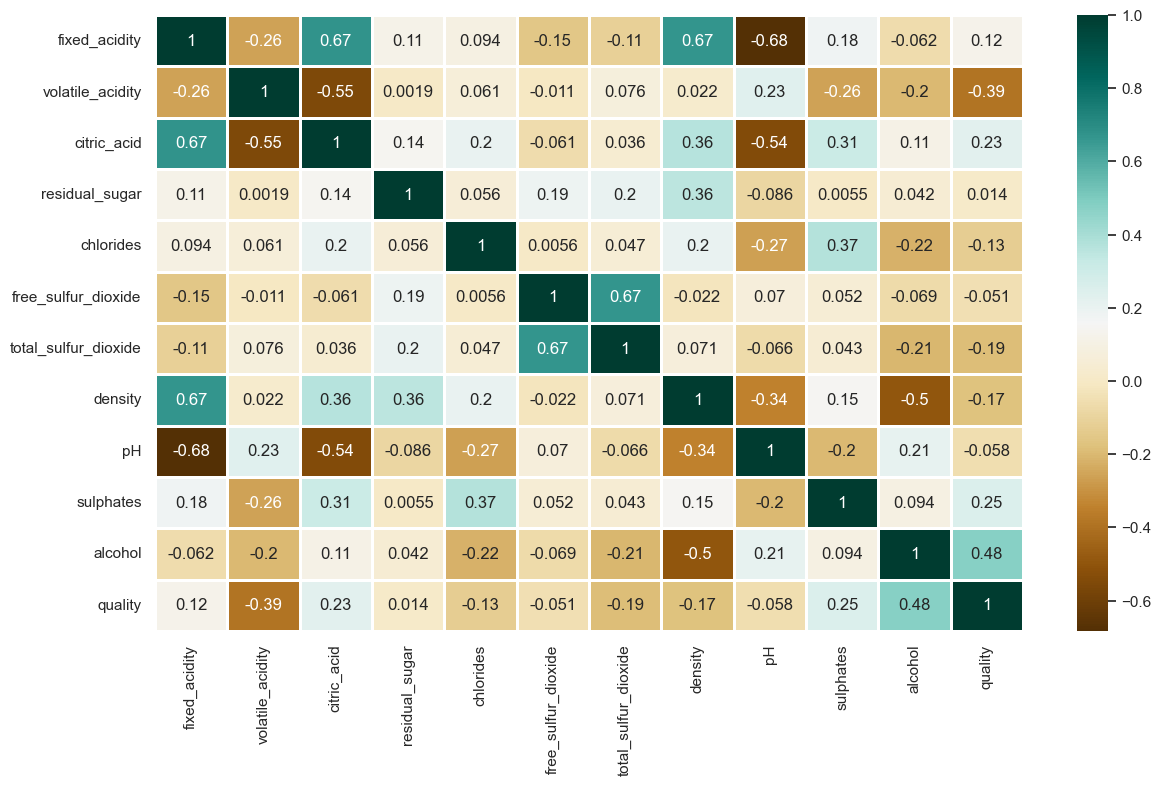

In [206]:
plt.figure(figsize=(14, 8))
sns.heatmap(wines.corr(), cmap = 'BrBG', linewidths = 2, annot = True)
plt.show()

**Use pairplot to observe correlation**

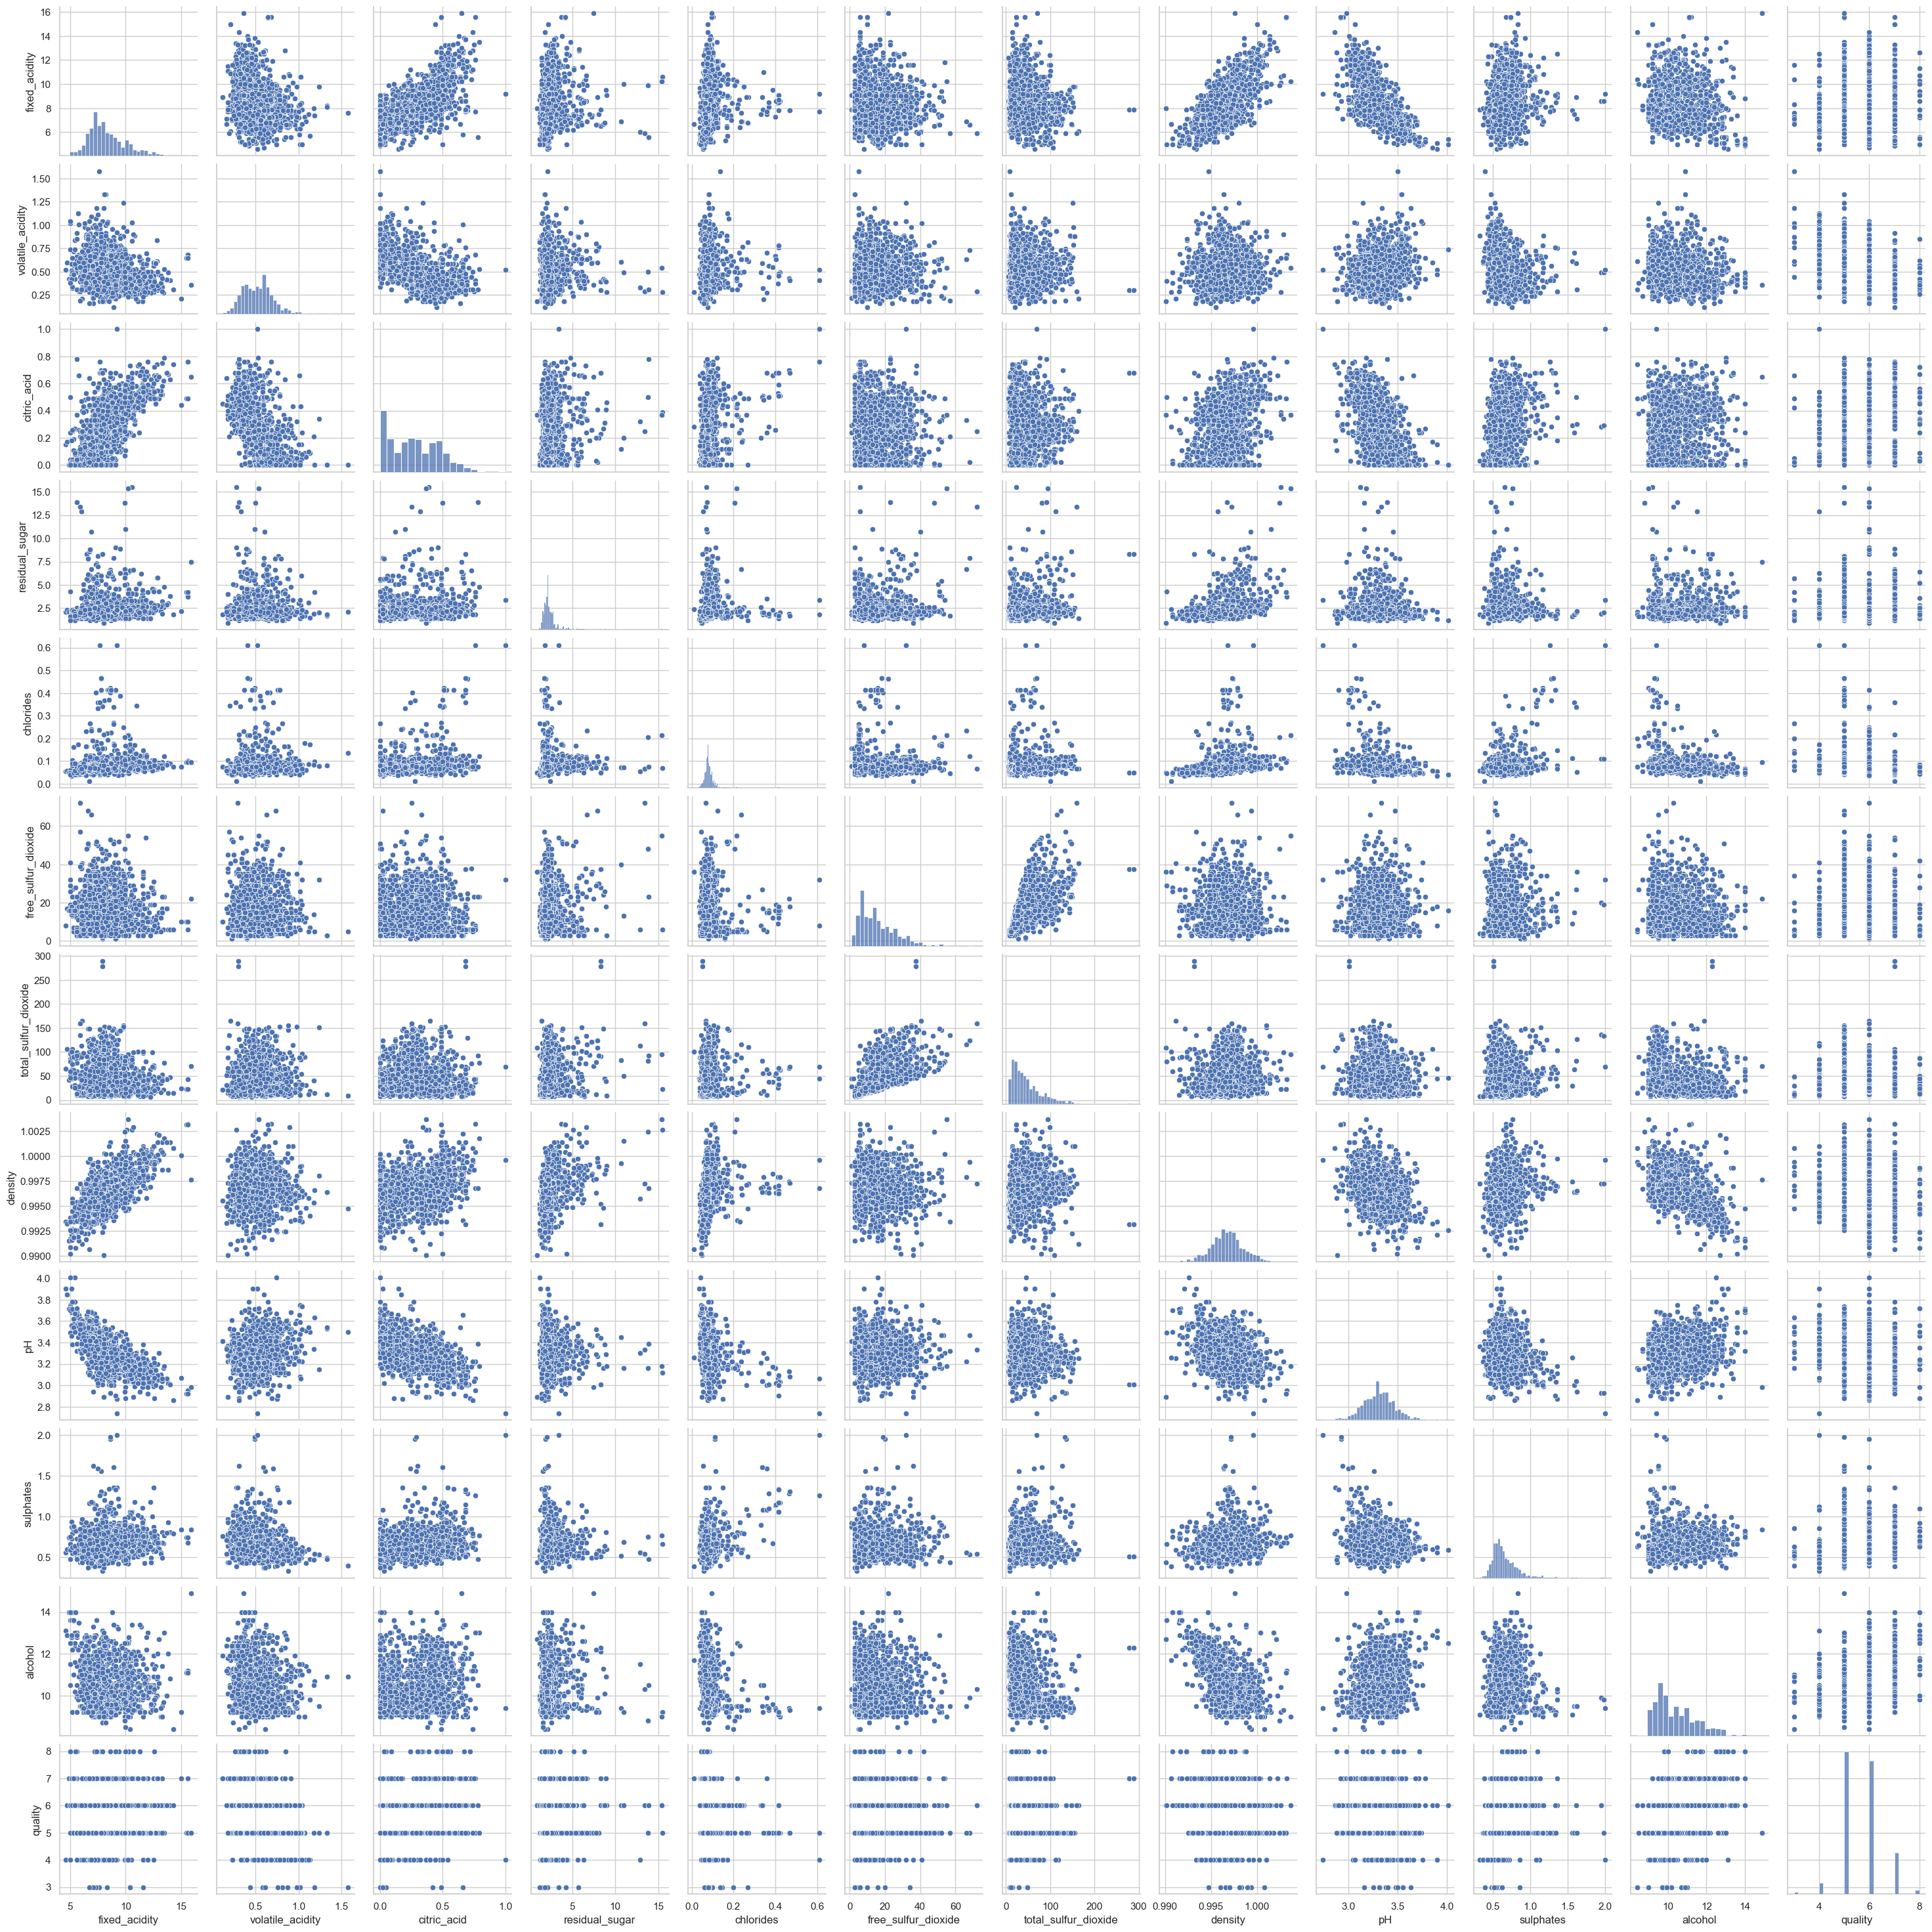

In [207]:
sns.pairplot(wines)
plt.show()

**We want to observe features if any one is much skewed since skewness could affect model prediction**

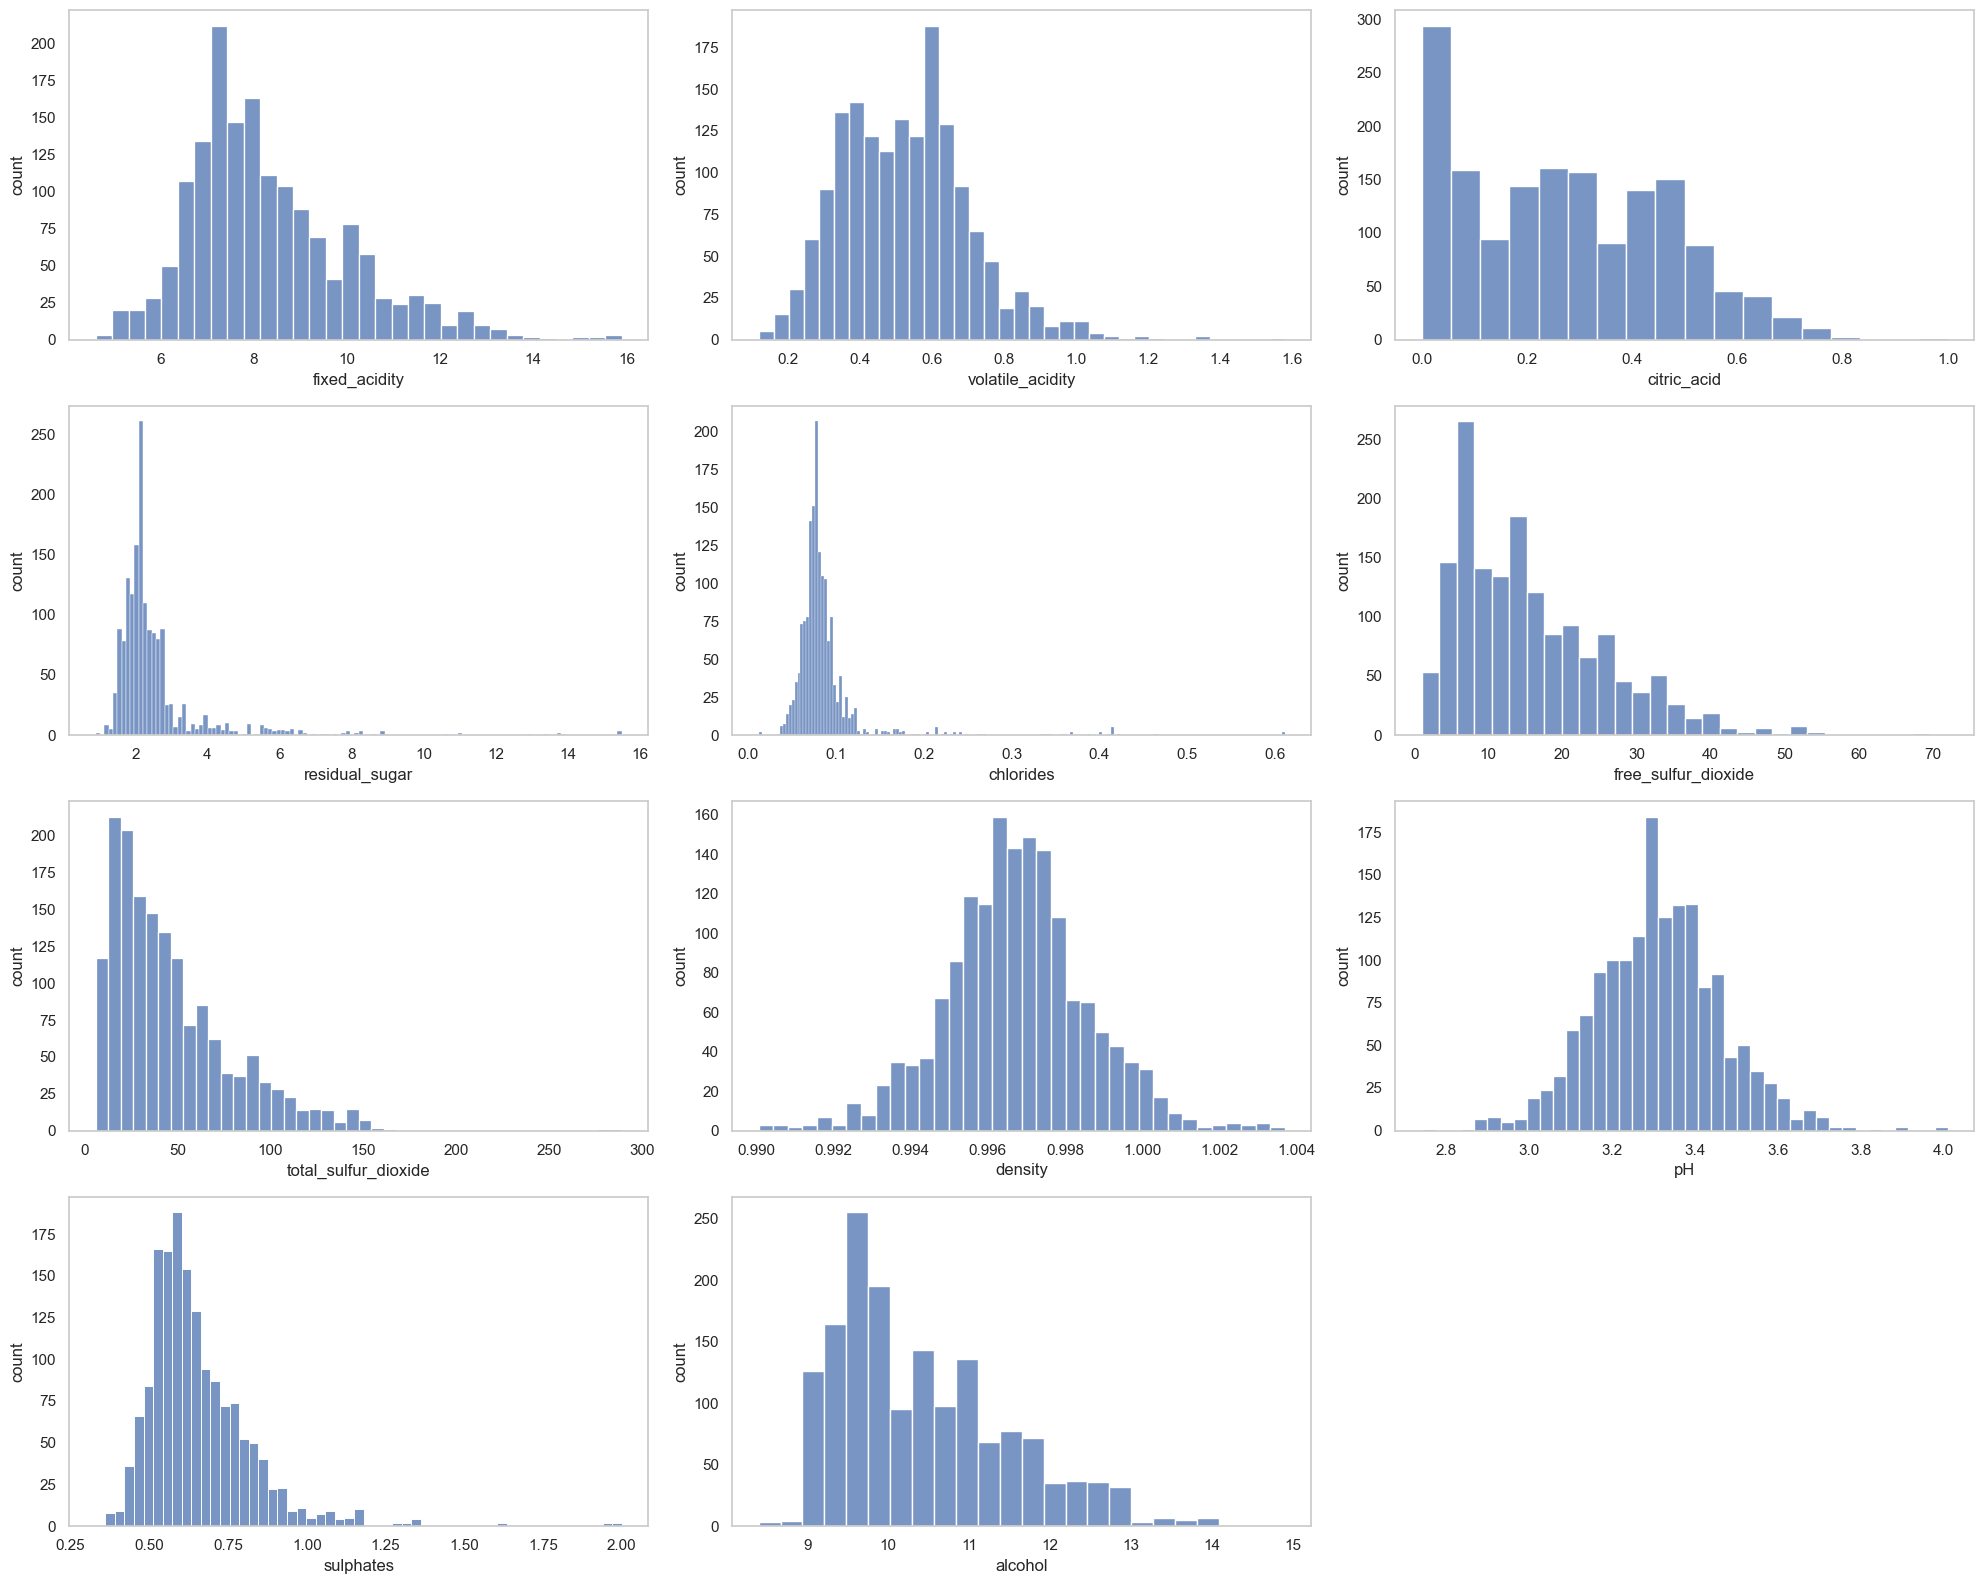

In [208]:
features = wines.drop(columns=['quality'], errors='ignore')

plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data = features[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.grid()
    plt.tight_layout()

plt.show()

**KDE to show the probability curve so we can observe the distribution of each feature**

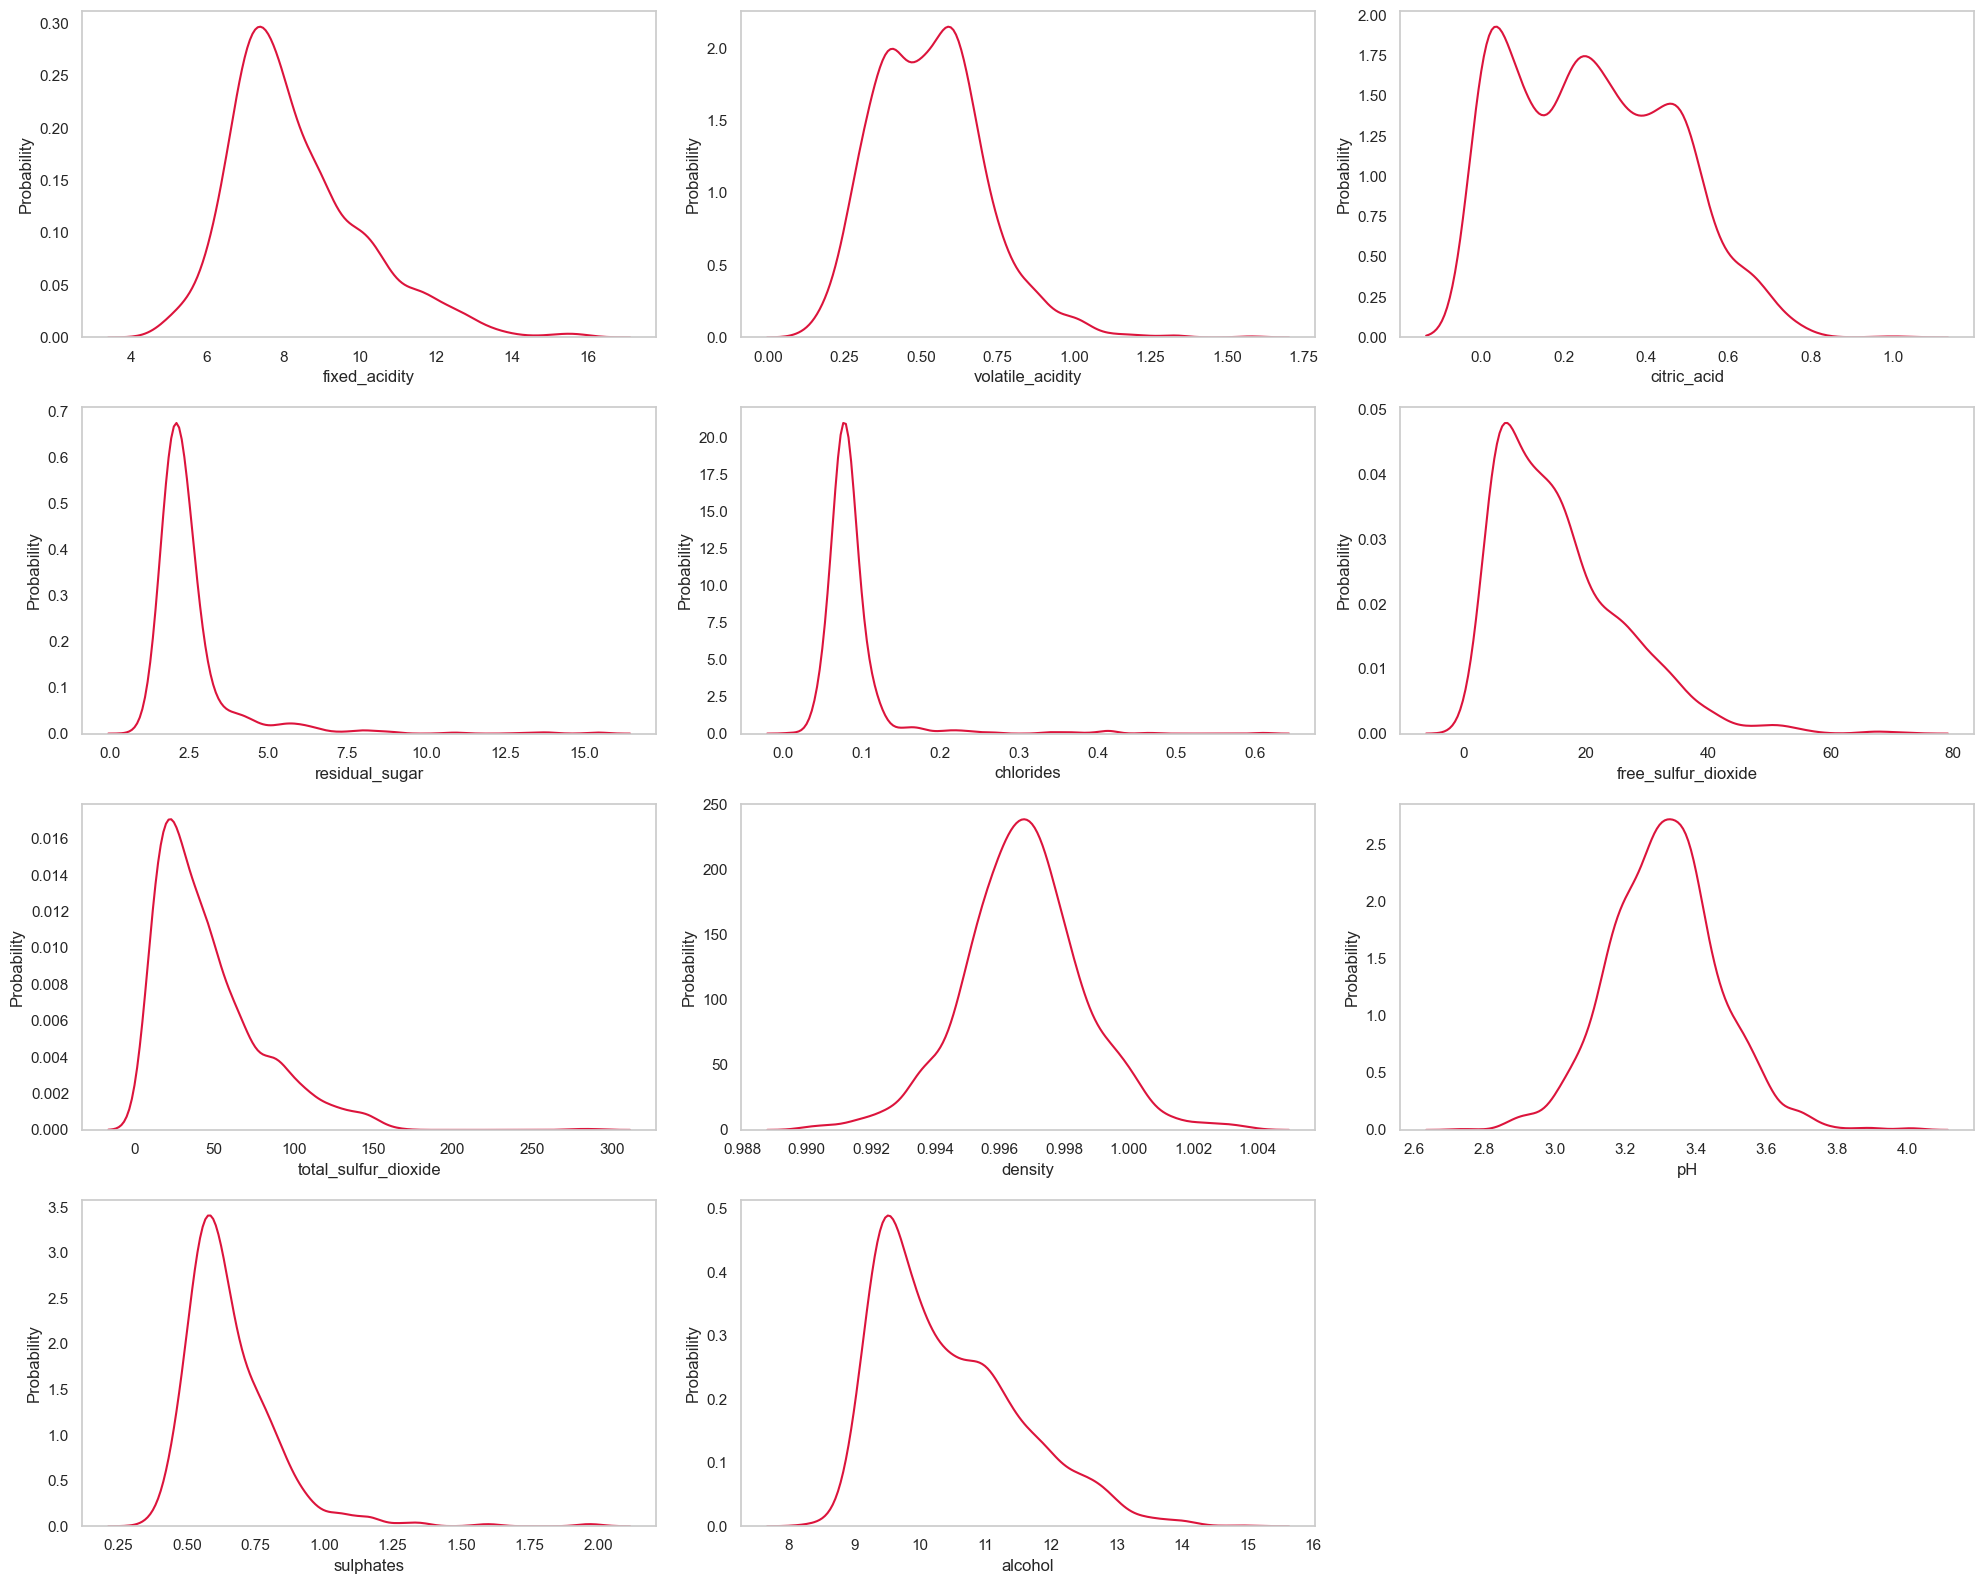

In [209]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.kdeplot(data = features[col], color = 'crimson')
    plt.xlabel(col)
    plt.ylabel('Probability')
    plt.grid()
    plt.tight_layout()

plt.show()

**We use scatterplot to find relationship**

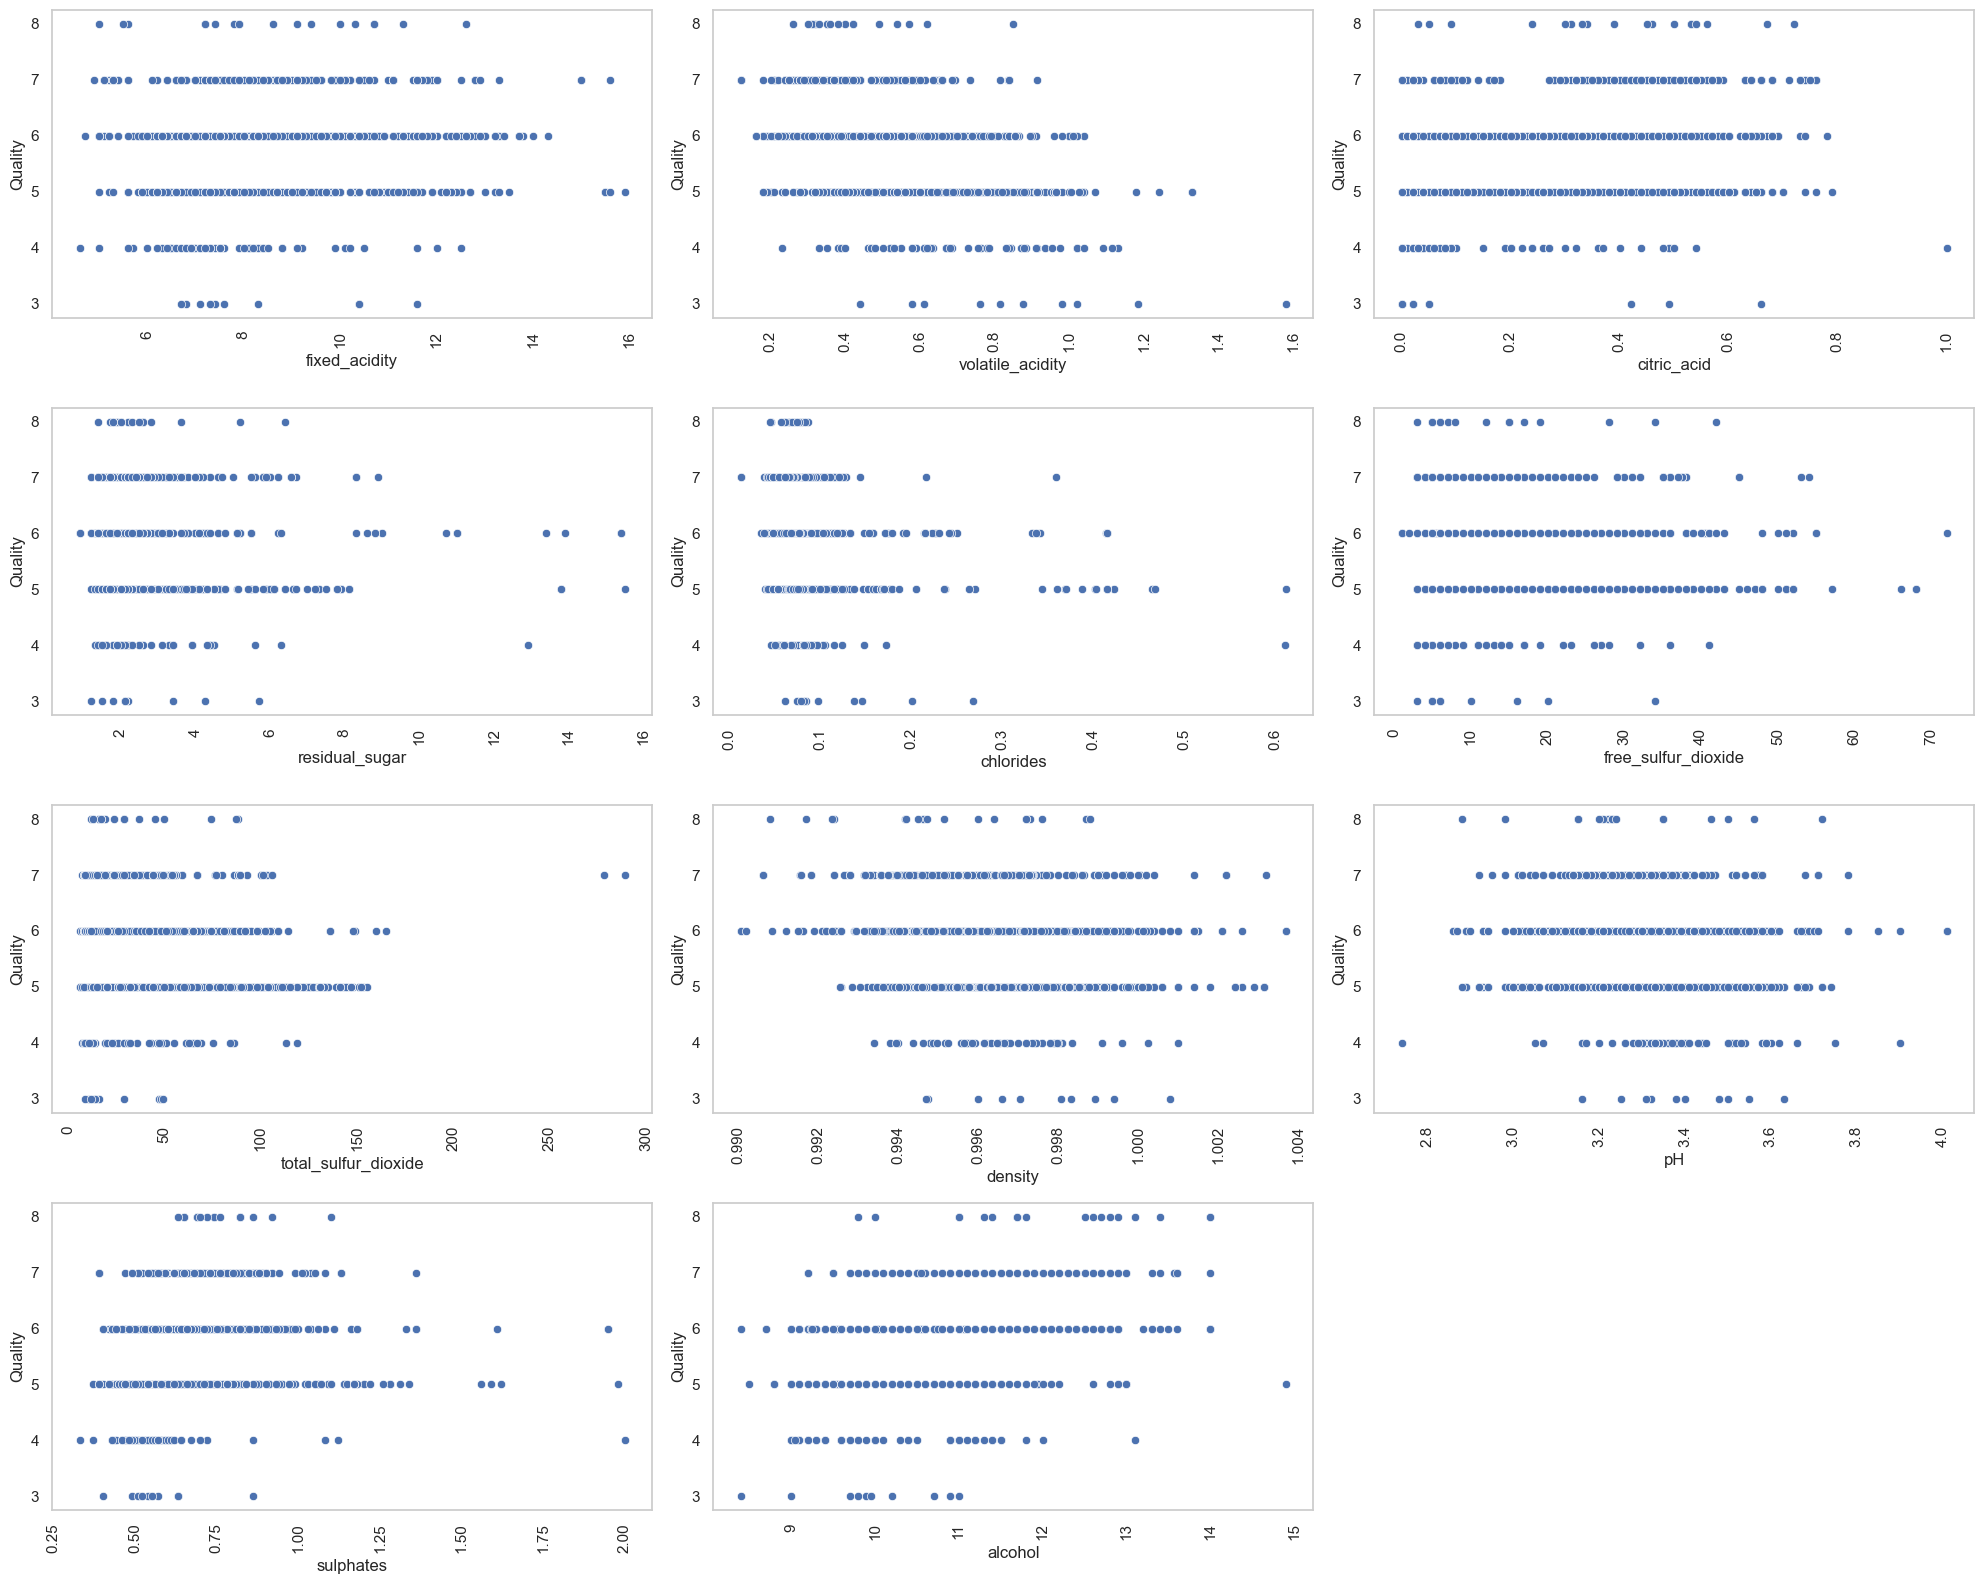

In [210]:
plt.figure(figsize = (20, 16))
for i, col in enumerate(list(features.columns.values)):
    plt.subplot(4, 3, i + 1)
    sns.scatterplot(x = wines[col], y = wines['quality'], data = wines)
    plt.xlabel(col)
    plt.ylabel('Quality')
    plt.xticks(rotation=90)
    plt.grid()
    plt.tight_layout()

plt.show()

**Check if there has outliers**

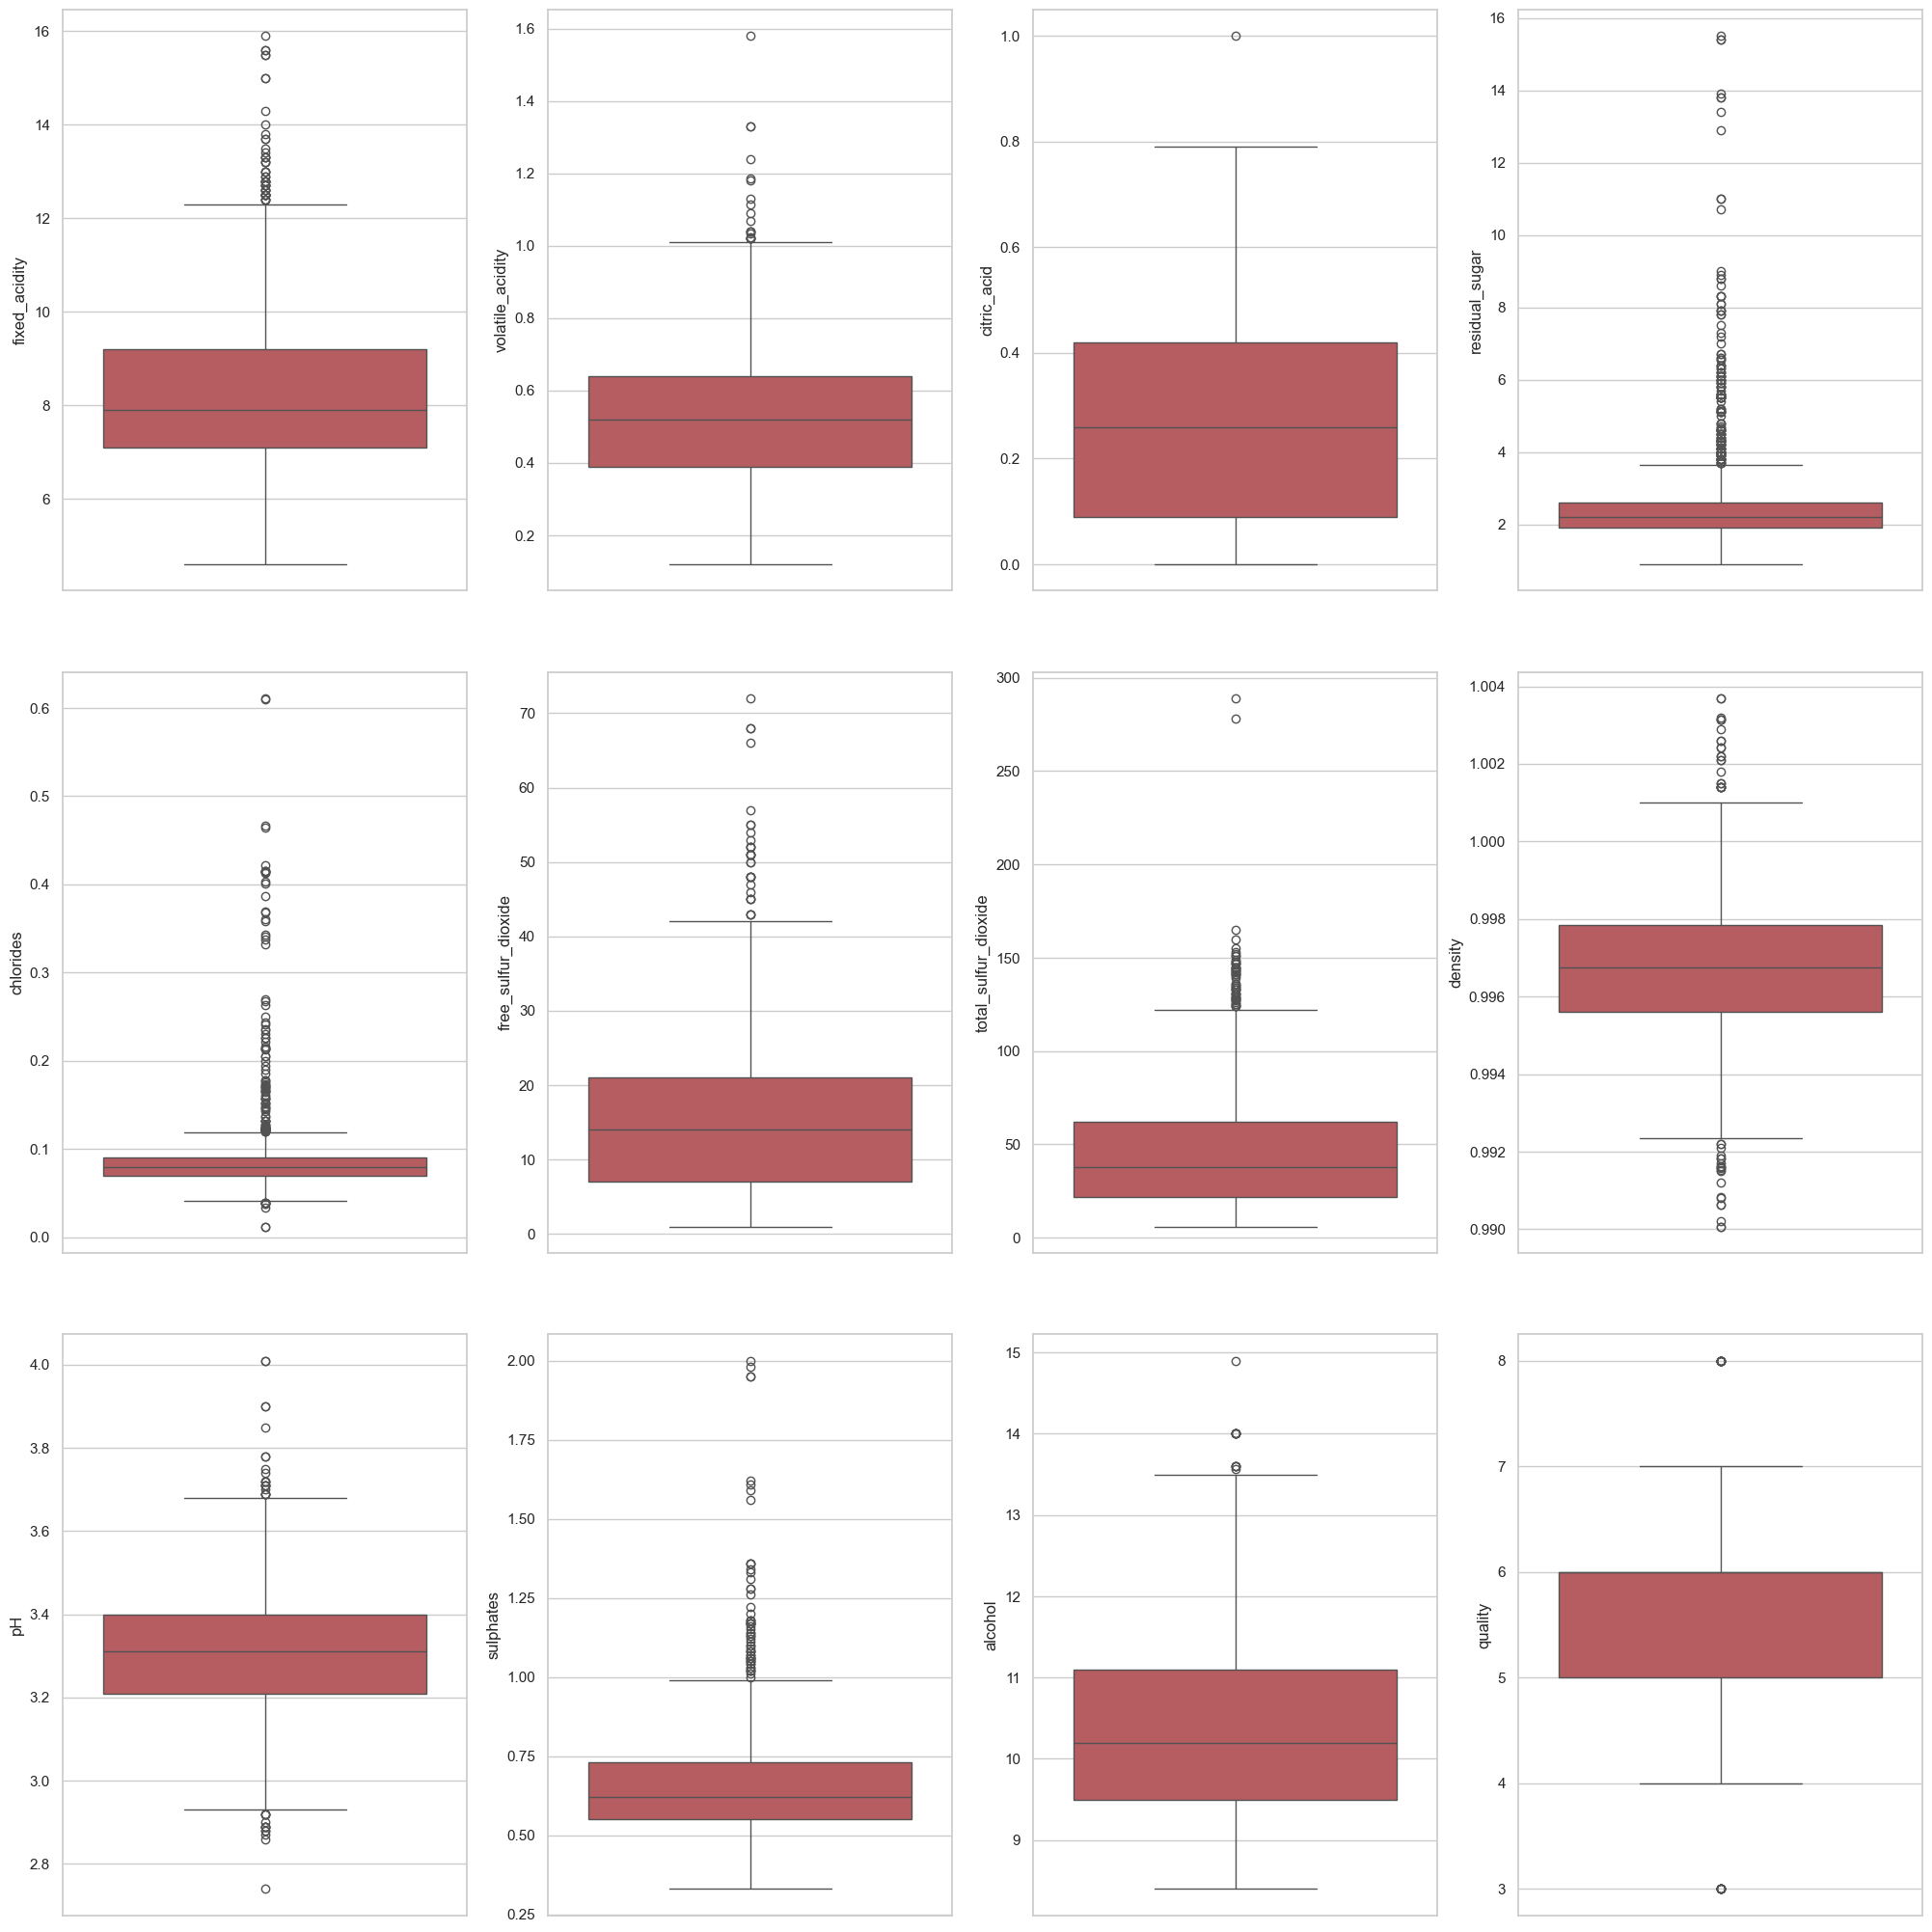

In [211]:
fig, ax = plt.subplots(ncols = 4, nrows = 3, figsize = (20,20))
index = 0
ax = ax.flatten()

for col, value in wines.items():
    sns.boxplot(y = col, data = wines, color='r', ax=ax[index])
    index = index + 1
    
plt.tight_layout(pad = 0.5, w_pad = 0.7, h_pad = 5.0)
plt.show()


**Shift data**

In [212]:
target_map = {3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}
wines['quality'].replace(to_replace = target_map, inplace = True)

**Shuffle data and split dataset to independent data and target data**

In [213]:
wines = wines.sample(frac=1).reset_index(drop=True)
x = wines.drop(['quality'], axis = 1)
y = wines.filter(['quality'], axis = 1)
print(x.head())
print()
print(y.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  \
0            7.5              0.52         0.11             1.5      0.079   
1            7.7              0.57         0.21             1.5      0.069   
2           11.9              0.37         0.69             2.3      0.078   
3           12.0              0.39         0.66             3.0      0.093   
4            7.1              0.31         0.30             2.2      0.053   

   free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  \
0                 11.0                  39.0  0.99680  3.42       0.58   
1                  4.0                   9.0  0.99458  3.16       0.54   
2                 12.0                  24.0  0.99580  3.00       0.65   
3                 12.0                  30.0  0.99960  3.18       0.63   
4                 36.0                 127.0  0.99650  2.94       1.62   

   alcohol  
0      9.6  
1      9.8  
2     12.8  
3     10.8  
4      9.5  

   qual

**Splitting the dataset into 80% training and 20% testing**

In [214]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state = 0)

print("Shape of x_train: {}".format(x_train.shape))
print("Shape of x_test: {}".format(x_test.shape))
print("Shape of y_train: {}".format(y_train.shape))
print("Shape of y_test: {}".format(y_test.shape))

Shape of x_train: (1279, 11)
Shape of x_test: (320, 11)
Shape of y_train: (1279, 1)
Shape of y_test: (320, 1)


**Logistic**

In [215]:
logistic_model = LogisticRegression(max_iter = 20000)
logistic_model.fit(x_train, np.ravel(y_train))
y_pred = logistic_model.predict(x_test)

accuracy = accuracy_score(np.ravel(y_test), y_pred)
print("Accuracy of logistic: {}".format(round(accuracy, 2)))

logistic_r_square = logistic_model.score(x_train, y_train)
print("R-Square of logistic: {}".format(round(logistic_r_square, 2)))

Accuracy of logistic: 0.6
R-Square of logistic: 0.6


**SVM**

In [216]:
# svc_model = SVC(kernel = 'rbf')
svc_model = SVC(kernel = 'linear')
svc_model.fit(x_train, np.ravel(y_train))
y_pred = svc_model.predict(x_test)

accuracy = accuracy_score(np.ravel(y_test), y_pred)
print("Accuracy of SVM: {}".format(round(accuracy, 2)))

svm_r_square = svc_model.score(x_train, y_train)
print("R-Square of SVM: {}".format(round(svm_r_square, 2)))

Accuracy of SVM: 0.58
R-Square of SVM: 0.59


**NN**

In [217]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 11, input_shape = (x_train.shape[1],), activation = 'relu'),
    tf.keras.layers.Dense(units = 9, activation ='relu'),    
    tf.keras.layers.Dense(units = 6, activation = 'softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [218]:
cl = model.fit(x_train, y_train, epochs = 100)

Epoch 1/100
40/40 [==============================] - 1s 2ms/step - loss: 3.1714 - accuracy: 0.1259
Epoch 2/100
40/40 [==============================] - 0s 2ms/step - loss: 1.6316 - accuracy: 0.3831
Epoch 3/100
40/40 [==============================] - 0s 2ms/step - loss: 1.4123 - accuracy: 0.4230
Epoch 4/100
40/40 [==============================] - 0s 2ms/step - loss: 1.3521 - accuracy: 0.4386
Epoch 5/100
40/40 [==============================] - 0s 2ms/step - loss: 1.3133 - accuracy: 0.4410
Epoch 6/100
40/40 [==============================] - 0s 1ms/step - loss: 1.2832 - accuracy: 0.4441
Epoch 7/100
40/40 [==============================] - 0s 1ms/step - loss: 1.2623 - accuracy: 0.4402
Epoch 8/100
40/40 [==============================] - 0s 1ms/step - loss: 1.2443 - accuracy: 0.4402
Epoch 9/100
40/40 [==============================] - 0s 1ms/step - loss: 1.2311 - accuracy: 0.4371
Epoch 10/100
40/40 [==============================] - 0s 2ms/step - loss: 1.2182 - accuracy: 0.4394
Epoch 11/

In [221]:
y_pred = model.predict(x_test)
y_test_list = np.array(y_test)
total = len(y_test)
correct = 0
predicton = []

for i in range(total):
    max_pred = np.argmax(y_pred[i])
    predicton.append(max_pred)
    if max_pred == y_test_list[i]:
        correct = correct + 1

print("Correct {}/{}".format(correct, total))
print("Accuracy of NN: {}".format(round(correct / total, 2)))

10/10 [==============================] - 0s 1ms/step
Correct 164/320
Accuracy of NN: 0.51


**Display classification report**

In [226]:
cr = classification_report(y_test, predicton, zero_division = 1.0)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.00      0.00         4
           1       1.00      0.00      0.00         6
           2       0.60      0.62      0.61       133
           3       0.45      0.61      0.52       130
           4       0.30      0.07      0.11        45
           5       1.00      0.00      0.00         2

    accuracy                           0.51       320
   macro avg       0.73      0.22      0.21       320
weighted avg       0.51      0.51      0.48       320

